<a href="https://colab.research.google.com/github/farihane-redouan/BASIC-ALGORITHMS-MACHINE-DEEP-LEARNING/blob/main/Basic_machine_learning4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

# **1.DataSet**

In [ ]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x,y=make_blobs(n_samples=1000,n_features=2,centers=2) # creation dataset linearement séparable avec  make_blobs 
y=y.reshape(np.shape(y)[0],1)
print(np.shape(x), np.shape(y))

(1000, 2) (1000, 1)


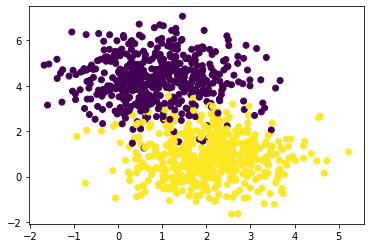

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y)

# **2.Train/Test-Set**

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)
print(np.shape(x_train))

(700, 2)


In [ ]:
X_train=np.hstack((x_train,np.ones((np.shape(x_train)[0],1))))
X_test=np.hstack((x_test,np.ones((np.shape(x_test)[0],1))))

In [ ]:
print(np.shape(X_test),X_test)

(300, 3) [[ 3.32503227  0.18780948  1.        ]
 [ 0.21839922  4.25370323  1.        ]
 [ 1.90577519  4.88601192  1.        ]
 [ 1.28933778  3.44969159  1.        ]
 [ 1.89532773  0.06570617  1.        ]
 [ 2.70899127  4.98828843  1.        ]
 [ 2.82942813  0.12320469  1.        ]
 [ 1.2998048  -0.30353786  1.        ]
 [ 0.30854979  4.63074992  1.        ]
 [ 2.07655442  5.6018093   1.        ]
 [ 1.52639767  1.07137551  1.        ]
 [ 2.00520557  4.23150032  1.        ]
 [ 2.97667592  1.35847814  1.        ]
 [ 0.90802847  6.01713005  1.        ]
 [ 0.7693664   5.18396624  1.        ]
 [-0.56452694  4.36704932  1.        ]
 [-0.07228289  2.88376939  1.        ]
 [ 2.55759576  0.03539666  1.        ]
 [ 2.69832207  1.48588859  1.        ]
 [ 2.15504965  4.12386249  1.        ]
 [ 1.69182974  1.67671488  1.        ]
 [ 0.18398342  3.77218142  1.        ]
 [ 2.24497013  2.60023381  1.        ]
 [ 1.4573852   7.06314244  1.        ]
 [ 4.50649724  0.68645768  1.        ]
 [ 1.99497999  1

In [ ]:
w =np.random.randn((np.shape(X_train)[1])).reshape(3,1)
print(np.shape(w),w)

(3, 1) [[-0.27011443]
 [ 0.32229121]
 [ 0.1503318 ]]


# **3.Modèle : Fonction d'Activation = Id/Sigmoid**

Dans le cas d'un problème de classification On peut alors utiliser comme fonction d'activation la fonction **sigmoid**
$\sigma(x^i\omega) =\frac{1}{1+e^{-x^i.\omega}}$, alors
$\sigma( \omega_0+ \sum_{j=1}^{n} \omega_j x_j^i) =\frac{1}{1+e^{-( \omega_0+ \sum_{j=1}^{n} \omega_j x_j^i) }}$\
Dans le cas d'un problème de régression, il n'est pas nécessaire de transformer la somme pondérée reçue en entrée. La fonction d'activation est la fonction **identité**, elle retourne ce qu'elle a reçu en entier.
$id(x^i\omega) = x^i\omega$, alors
$id( \omega_0+ \sum_{j=1}^{n} \omega_j x_j^i) =\omega_0+ \sum_{j=1}^{n} \omega_j x_j^i$


In [ ]:
import math
def Activation_function(xi,w,Activation):
   pc=xi.T.dot(w)
   if Activation=='id':
     if pc<0.5:
       return 0
     else:
       return 1
   elif Activation=='sigmoid':
     if pc<0.5:
       return 0
     else:
       return 1
   else:
     return 'error'

In [ ]:
c=Activation_function(X_test[0,:],w, 'sigmoid')
c

0

# **4. Gradients et Descente de Gradient**

**--> Le cas de classification sigmoid :**
$ Erreur_i = \frac{1}{2}  ( \sigma( \omega_0+ \sum_{j=1}^{n} \omega_j x_j^i) - y_i)^2 $\
$\frac{Erreur_i(\omega) }{\partial \omega} = (\sigma(x^i\omega) -y^i)\sigma(x^i\omega)^2e^{-x^i.\omega}\omega$\
**--> Le cas de regression id :**
$ Erreur_i = \frac{1}{2}  ( \omega_0+ \sum_{j=1}^{n} \omega_j x_j^i - y_i)^2 $\
$\frac{Erreur_i(\omega) }{\partial \omega} =  (x^i\omega -y^i).x^i$,\
Avec $x^i$ est un vecteur de taille m+1, m le nombre des caractéristiques.


In [ ]:
def Gradient(xi,yi,w,Activation):
  if Activation=='id':
    return (Activation_function(xi,w,Activation)-yi)*xi.reshape(np.shape(xi)[0],1)
  elif Activation=='sigmoid':
    return w*math.exp(Activation_function(xi,w,'id'))*(Activation_function(xi,w,Activation)-yi)*(Activation_function(xi,w,Activation))**2
  else:
    return 'error'

In [ ]:
g1=Gradient(X_train[0,:],y_train[0],w,'id')
g2=Gradient(X_train[55,:],y_train[55],w,'id')
print(np.shape(g1),g1)
print(np.shape(g2),g2)

(3, 1) [[0.]
 [0.]
 [0.]]
(3, 1) [[0.93409863]
 [4.01690014]
 [1.        ]]


In [ ]:
def Descente_Gradient(X,y,w,Activation,rate,nb_iteration):
  nb_exemples=np.shape(X)[0]
  for k in range(0,nb_iteration):
    for i in range(0,nb_exemples):
      w=w-rate*Gradient(X[i,:],y[i],w,Activation) # mise a jour du parametre w (formule du gradient descent)
  return w

In [ ]:
def Prediction(X,w_final,Activation):
  nb_exemples=np.shape(X)[0]
  y_pred=np.zeros(nb_exemples)
  for i in range(0,nb_exemples):
     y_pred[i]=Activation_function(X[i,:],w_final,Activation)
  return y_pred

# **5.Phase d'entrainement**

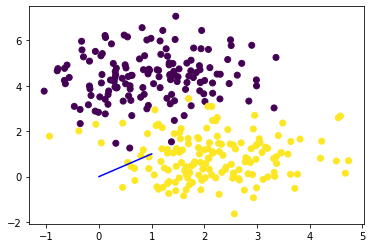

In [ ]:
w_final=Descente_Gradient(X_train,y,w,'id',0.01,1000)
Predection=Prediction(X_test,w_final,'id')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.plot(Predection,Predection,c='b')

In [ ]:
cof_determination(y_test,Predection)

-609.3540295321118